In [5]:
import subprocess 
import numpy as np
import correlation_functions
import matplotlib.pyplot as plt
import scipy.constants 

In [6]:
pacc_list = []
autocorrelation_time_list = []
offset = 10
for delta in [50, 15, 6, 2, 1.5, 1]:
    outfile_metro = 'metro_output'+ str(delta)
    output=subprocess.check_output( './metro.out' + ' 5000  1 ' + str(delta) +  ' > ' + outfile_metro, shell=True)
    pacc_list.append(float(subprocess.check_output(['tail', '-1', outfile_metro], encoding='UTF-8').split()[-1]))
# plt.plot(pacc_list)

for delta in [50, 15, 6, 2, 1.5, 1]:
    outfile_metro = 'metro_output'+ str(delta)
    metro = np.genfromtxt(outfile_metro, skip_footer=1, unpack=True)[::2]
    Auto_correlation_time_metro = []
    for tau in range(1,50):
        temp_metro = 0.5
        for i in range(1,tau):
            temp_metro += correlation_functions.Correlation(metro, metro, offset=i)
        Auto_correlation_time_metro.append(temp_metro)
    autocorrelation_time_list.append(Auto_correlation_time_metro[-1])

print(pacc_list)
print(autocorrelation_time_list)


[0.03325, 0.102667, 0.240083, 0.517583, 0.598833, 0.687]
[11.251299435789006, 4.982943102577263, 2.7563649642681276, 4.814510057598579, 5.848233777947943, 9.930030011545556]


Text(0.5, 1.0, 'Gibbs')

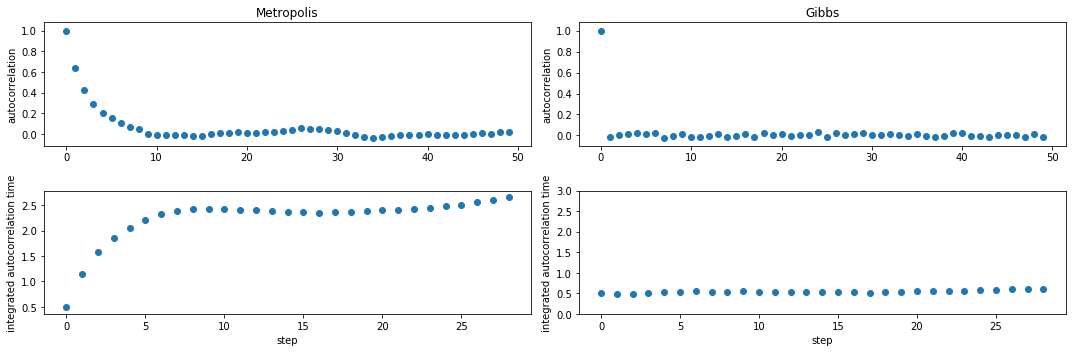

In [7]:
outfile_gibbs = 'gibbs_output'
output=subprocess.check_output( './gibbs.out' + ' 5000' + ' > ' + outfile_gibbs, shell=True)

outfile_metro = 'metro_output'
output=subprocess.check_output( './metro.out' + ' 5000 1 6 ' + ' > ' + outfile_metro, shell=True)

gibbs = np.loadtxt(outfile_gibbs, unpack=True)[::2]
metro = np.genfromtxt(outfile_metro, skip_footer=1, unpack=True)[::2]

offset = 50
correlation_metro = [correlation_functions.Correlation(metro, metro, offset=i) for i in range(0, offset)]
correlation_gibbs = [correlation_functions.Correlation(gibbs, gibbs, offset=i) for i in range(0, offset)]

Auto_correlation_time_metro = []
Auto_correlation_time_gibbs = []

fig, ax = plt.subplots(2,2, figsize=(15, 5), tight_layout=True)

for tau in range(1,30):
    temp_gibbs = 0.5
    temp_metro = 0.5
    for i in range(1,tau):
        temp_gibbs += correlation_functions.Correlation(gibbs, gibbs, offset=i)
        temp_metro += correlation_functions.Correlation(metro, metro, offset=i)
    Auto_correlation_time_gibbs.append(temp_gibbs)
    Auto_correlation_time_metro.append(temp_metro)

ax[0,0].scatter(range(0, offset), correlation_metro)
ax[0,1].scatter(range(0, offset), correlation_gibbs)
ax[1,1].scatter(range(0,len(Auto_correlation_time_gibbs)), Auto_correlation_time_gibbs)
ax[1,0].scatter(range(0,len(Auto_correlation_time_metro)), Auto_correlation_time_metro)

ax[1,0].set_xlabel('step')
ax[1,1].set_xlabel('step')
ax[0,0].set_ylabel('autocorrelation')
ax[0,1].set_ylabel('autocorrelation')
ax[1,0].set_ylabel('integrated autocorrelation time')
ax[1,1].set_ylabel('integrated autocorrelation time')
# ax[1,0].set_ylim(0,3)
ax[1,1].set_ylim(0,3)

# ax[i].set_ylabel('autocorrelation')
ax[0,0].set_title('Metropolis')
ax[0,1].set_title('Gibbs')

In [313]:
pacc_transform = lambda process: float(process.communicate()[1].decode().replace('acc = ','')) #lambda function to transform the cerr 



L = 50
# beta = 1/(sci py.constants.Boltzmann*273)
beta = 0.2

outfile_ising_metro = 'ising_metro_output'
process = subprocess.Popen('./ising_metro.out ' + str(L) + ' ' + '{:f}'.format(beta) + ' ' + '0 20000 100' + ' > ' + outfile_ising_metro, shell=True, stderr=subprocess.PIPE)
pacc = pacc_transform(process) #da un risultato diverso da quello della console
print(pacc)

# outfile_ising_gibbs = 'ising_gibbs_output'
# process = subprocess.Popen('./ising_gibbs.out ' + str(L) + ' ' + '{:f}'.format(beta) + ' ' + '0 10000 1' + ' > ' + outfile_ising_gibbs, shell=True, stderr=subprocess.PIPE)
# pacc = pacc_transform(process) #da un risultato diverso da quello della console
# print(pacc)

0.692075


In [314]:
ising_metro = np.loadtxt(outfile_ising_metro, unpack=True)
# ising_gibbs = np.loadtxt(outfile_ising_gibbs, unpack=True)

Text(0.5, 0, 'Sweep Number')

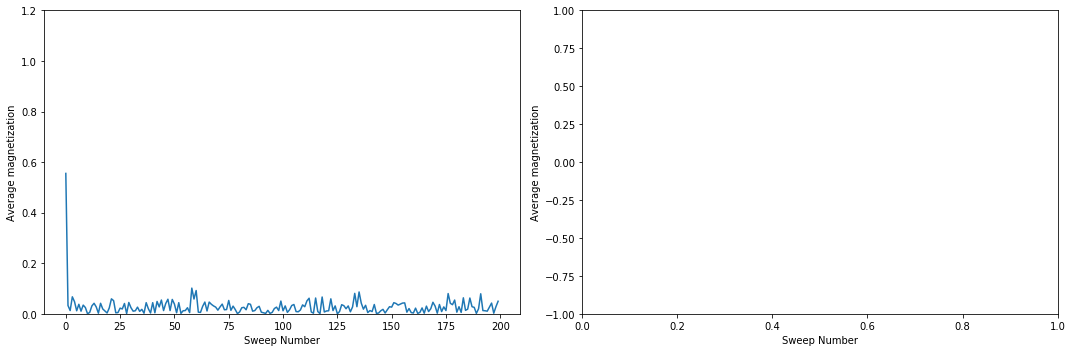

In [315]:
fig, ax = plt.subplots(1,2, figsize=(15, 5), tight_layout=True)

ax[0].plot(ising_metro)
# ax[0].plot(ising_gibbs)
## add error estimate
ax[0].set_ylim(0,1.2)
ax[1].set_ylim(-1,1)
ax[0].set_ylabel('Average magnetization')
ax[1].set_ylabel('Average magnetization')
ax[0].set_xlabel('Sweep Number')
ax[1].set_xlabel('Sweep Number')